# Initial Dataset Cleaning...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('darkgrid')

### Let's see this data...

In [3]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [195]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [196]:
house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# First look at waterfront columns to see what's going on...
# ... we'll have to do something about the NaN values. 
# Filling with 0 is best option based on the frequencies.
print(house_data['waterfront'].value_counts())
house_data['waterfront'].unique()

0.0    19075
1.0      146
Name: waterfront, dtype: int64


array([nan,  0.,  1.])

In [5]:
house_data['waterfront'].fillna(0, inplace=True)
house_data['waterfront'].isna().sum()

0

In [6]:
# Likely high count for 0 since the house hasn't been renovated
# May be interesting to create a unique feature of only houses that have been renovated
# and see if the payoff is high (if so, we can recommend focusing on remodeling)
print(house_data['yr_renovated'].value_counts())
house_data['yr_renovated'].unique()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [7]:
house_data['yr_renovated'].isna().sum()

3842

In [8]:
house_data['yr_renovated'].fillna(0, inplace=True)
house_data['yr_renovated'].isna().sum()

0

In [9]:
house_data['view'].fillna(0, inplace=True)
house_data['view'].isna().sum()

0

In [10]:
house_data.drop('id', axis=1, inplace=True)
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
house_data['sqft_basement'].replace('?', 0, inplace=True)

In [12]:
house_data['sqft_basement'] = house_data['sqft_basement'].astype('float64')

# Post-cleaning EDA...

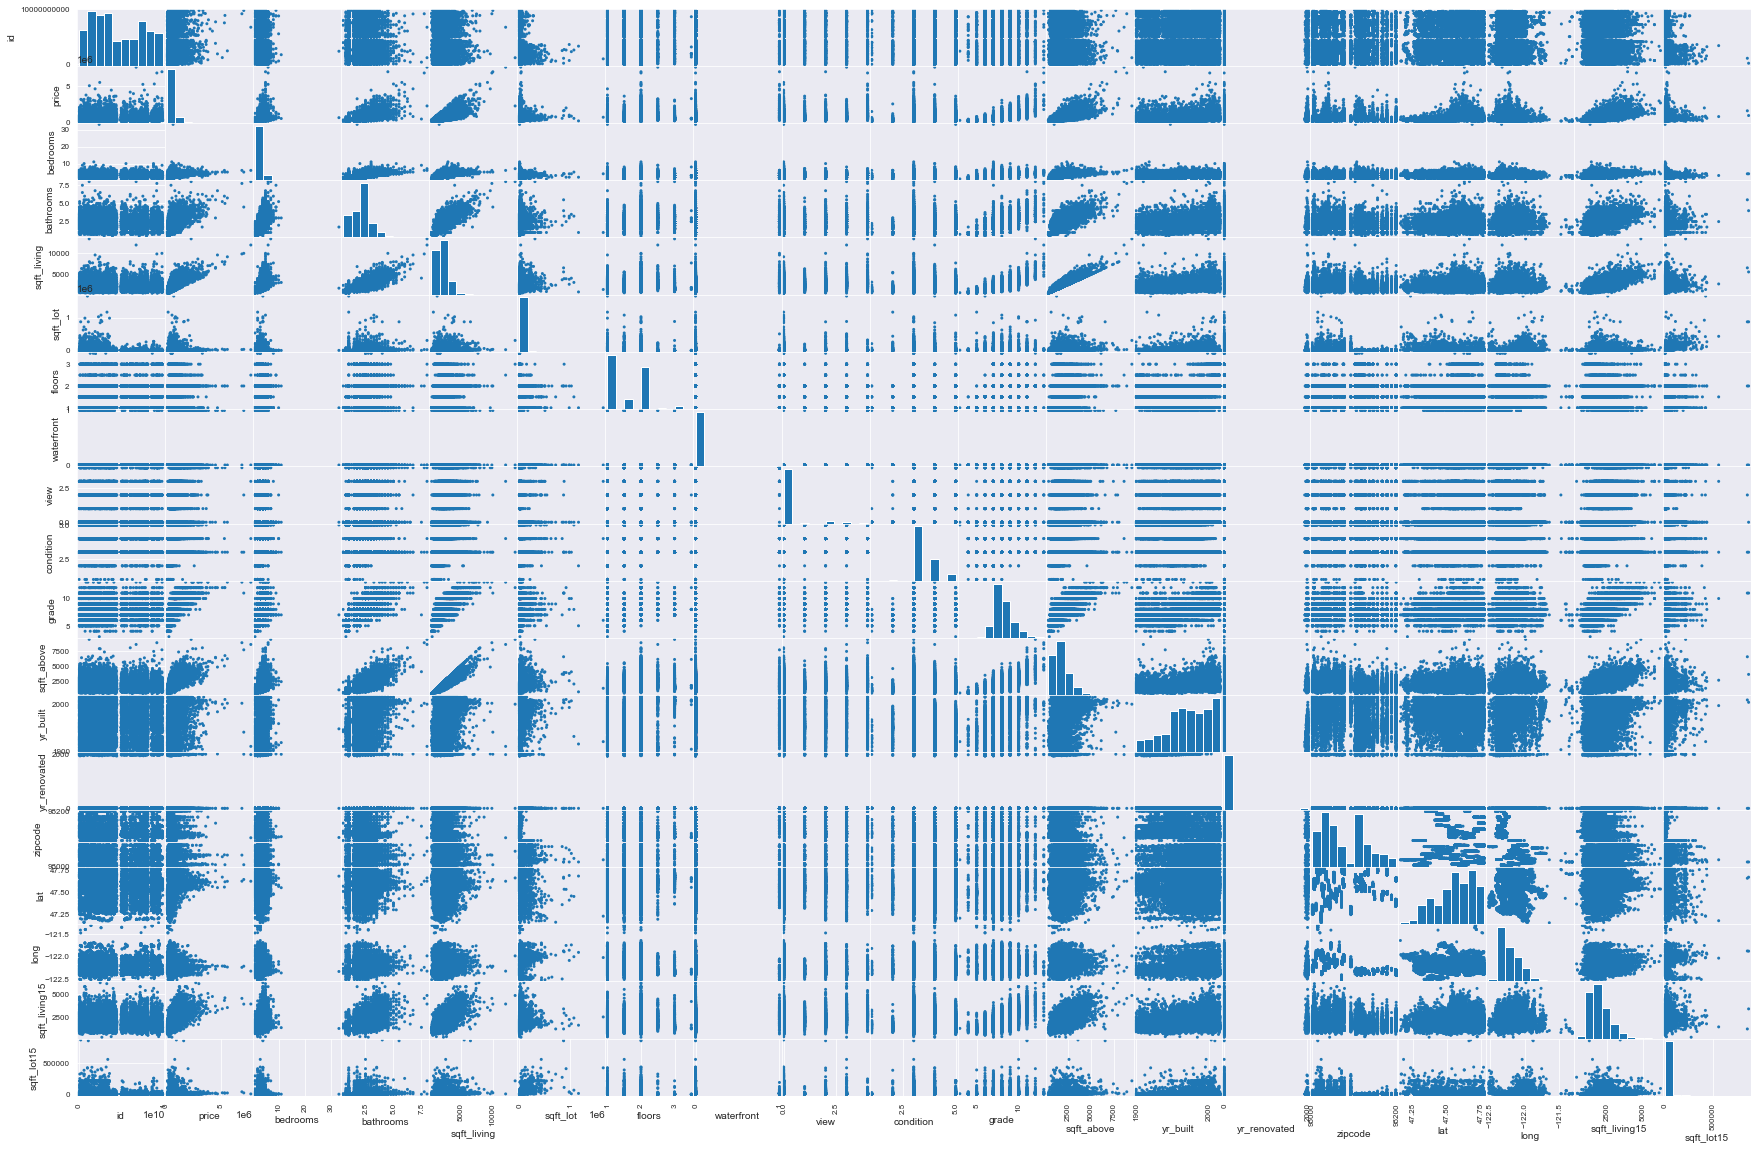

In [13]:
# define the plot
pd.plotting.scatter_matrix(house_data, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [ ]:
# The plot above is pretty difficult to read. Let's make a few sub-scatter matrixes
# while keeping price consistent throughout (since we're interested as using price as our y-variable)

In [13]:
# Creating sub-lists of x-columns to create the four scatter matrixes
list_col = list(house_data.columns)
list_col2 = list_col[1:2] + list_col[6:10]
list_col2
list_col3 = list_col[1:2] + list_col[10:15]
list_col3
list_col4= list_col[1:2] + list_col[15:21]
list_col4

['price', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

#### Plot 1
Looking across the top row with price as the y-variable:

- Price itself looks skewed right with outliers on the tail. When analyzing, may work best to remove outliers and 
  log-normalize the data. The tradeoff is this will be less interpretable but a potentially better prediction model
  
- Bedrooms may have a positive relationship though there are are outliers and the bedrooms histogram is skewed

- Bathrooms has a moderately strong positive correlation with price. A log-normalization would improve the skew

- Sqft_living looks to have a fairly strong positive correlation. There is a right skew in the data with high density   for square-footage under 400

- Sqft_lot appears to have little or no correlation with price. This may be that location is a more important           predictor than the size of the lot

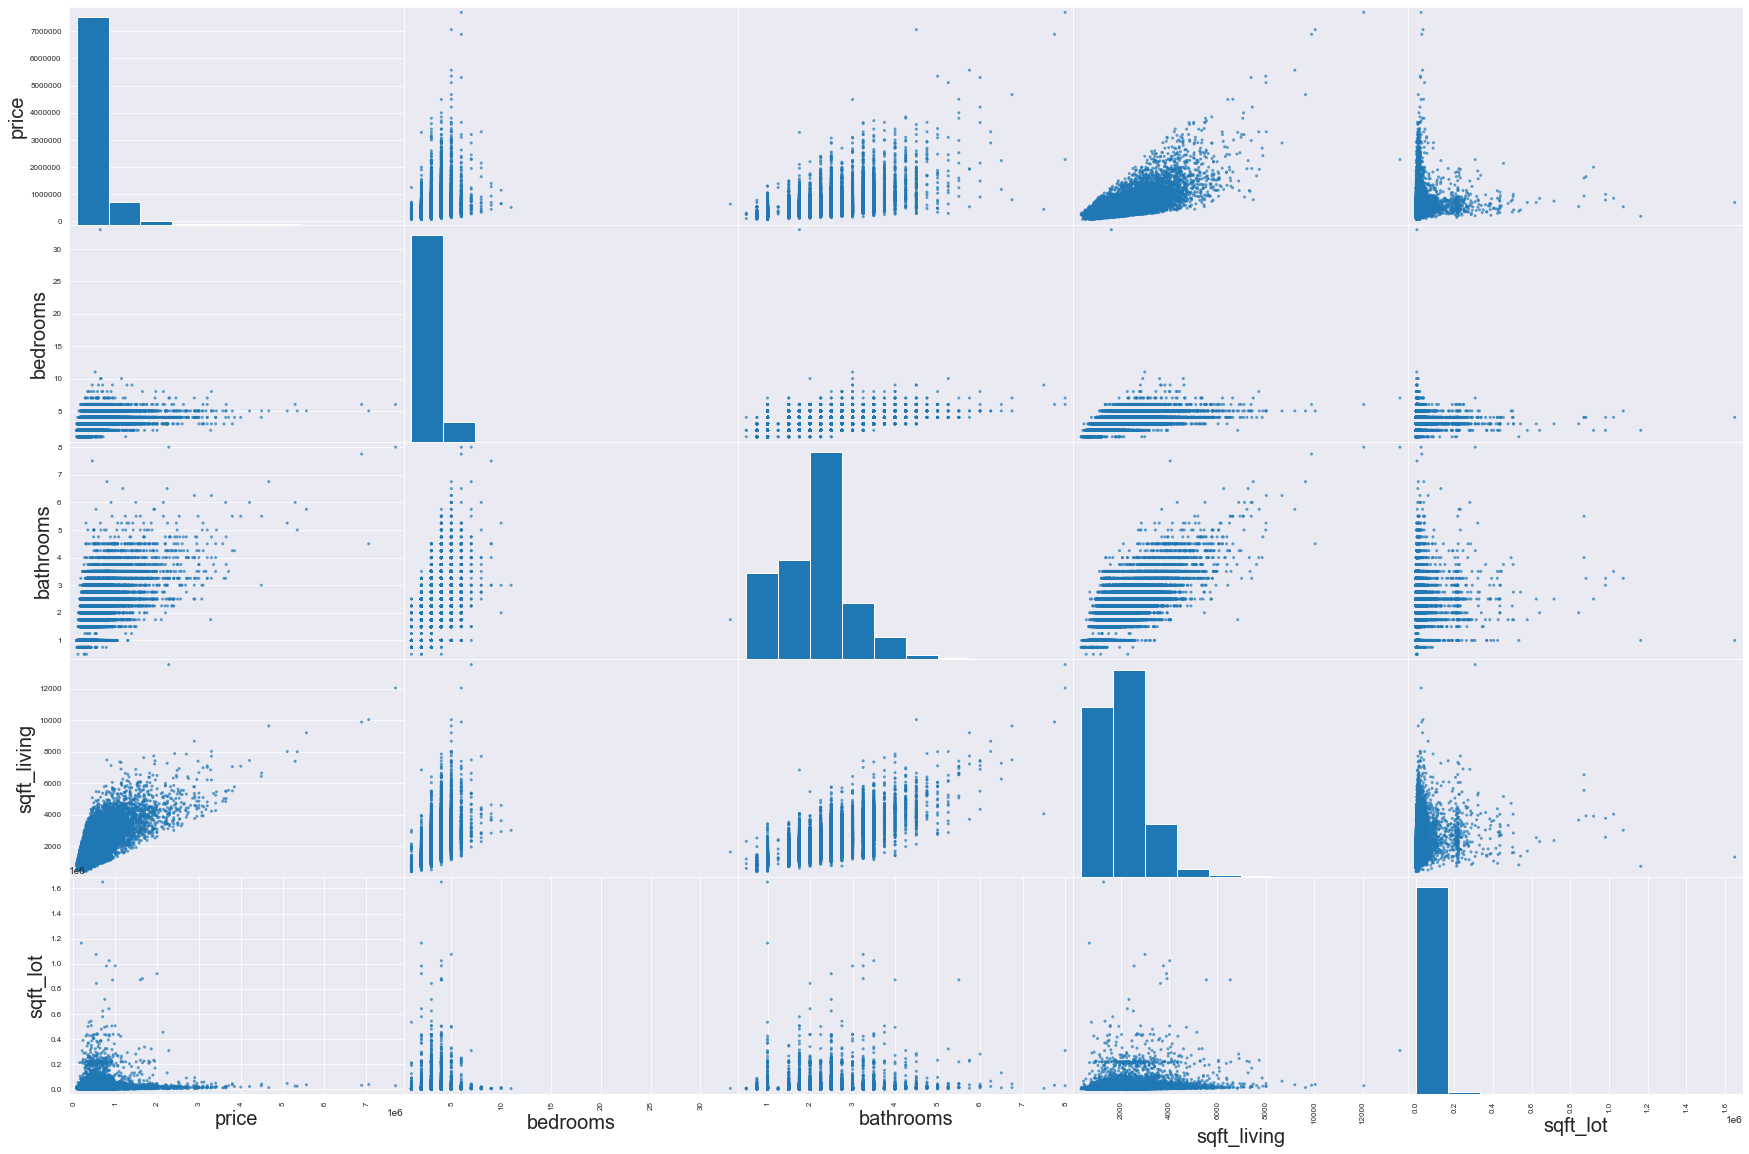

In [207]:
matrix = pd.plotting.scatter_matrix(house_data[list_col[1:6]], alpha=.7, figsize=(30,20));

for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

#### Plot 2
Looking across the top row with price as the y-variable:

- Floors (# of) does not look to have any clear relationship with price. The data may be improved by rounding the half   floors up though it changes the data itself. Btw, how can you have half of a floor...?

- Waterfront is either yes or no. The majority of homes are no waterfront and run the range of price. Maybe if we look   more granularly we would see a strong relationship with price and waterfront... but with how little waterfront         properties there are, it may not be the best business decision to index for

- Views (# of times the house was viewed before purchase) does not seem to have any relationship with price

- Condition may have a small correlation with price. It's interesting to note that middle-of-the-road conditions are     most frequent, but also extend the range of prices. Again, maybe location is a better predictor. People may buy       older "fixer-uppers" in more expensive locations. Plus, older homes just have character (v scientific), you know...

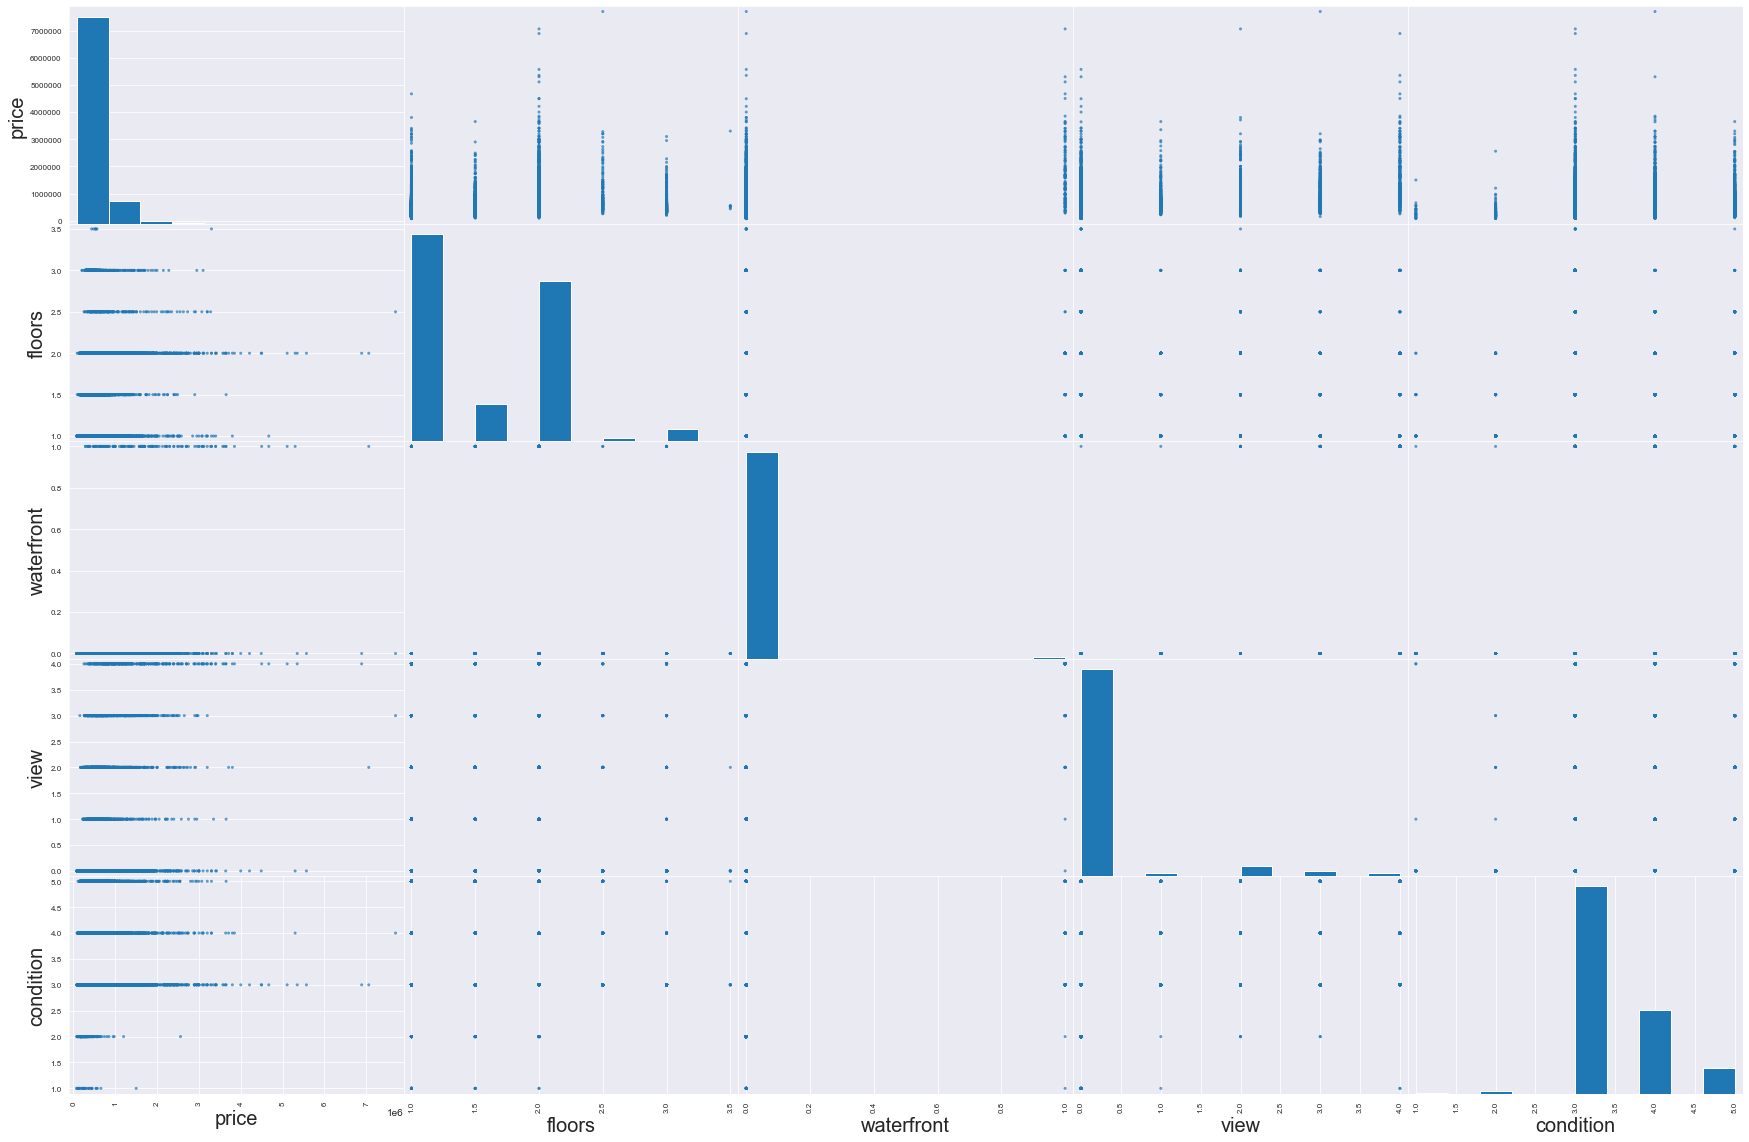

In [98]:
matrix = pd.plotting.scatter_matrix(house_data[list_col2], alpha=.7, figsize=(30,20));

for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

#### Plot 3
Looking across the top row with price as the y-variable:

- Grade looks to have a positive trend with price (though ^ variance) with a fairly normal distribution. Slight         skew on upper end. (Again, unless we're building homes for Bill Gates, may be best to drop the upper end.)

- Sqft_above has a fairly positive correlation. The data itself is skewed right. Log to the rescue. 
  (New super hero? Log Gal?)
  
- Sqft_basement may have a positive relationship with price though there are plenty of no-basement-expensive houses.     Also may be some collinearity with sqft_above.

- Yr_built doesn't have any clear relationship with price. This is likely true since it doesn't take into account       rennovated houses and the number of houses increase with time based on growing populations.

- Yr_renovated will be difficult to show any clear relationshhpi with price. Most houses aren't rennovated. If so,       they may sell at a higher price but the # of houses is minimal. We need Chip & Joanna to visit Seattle. May be nice to try it as categorical data in the model

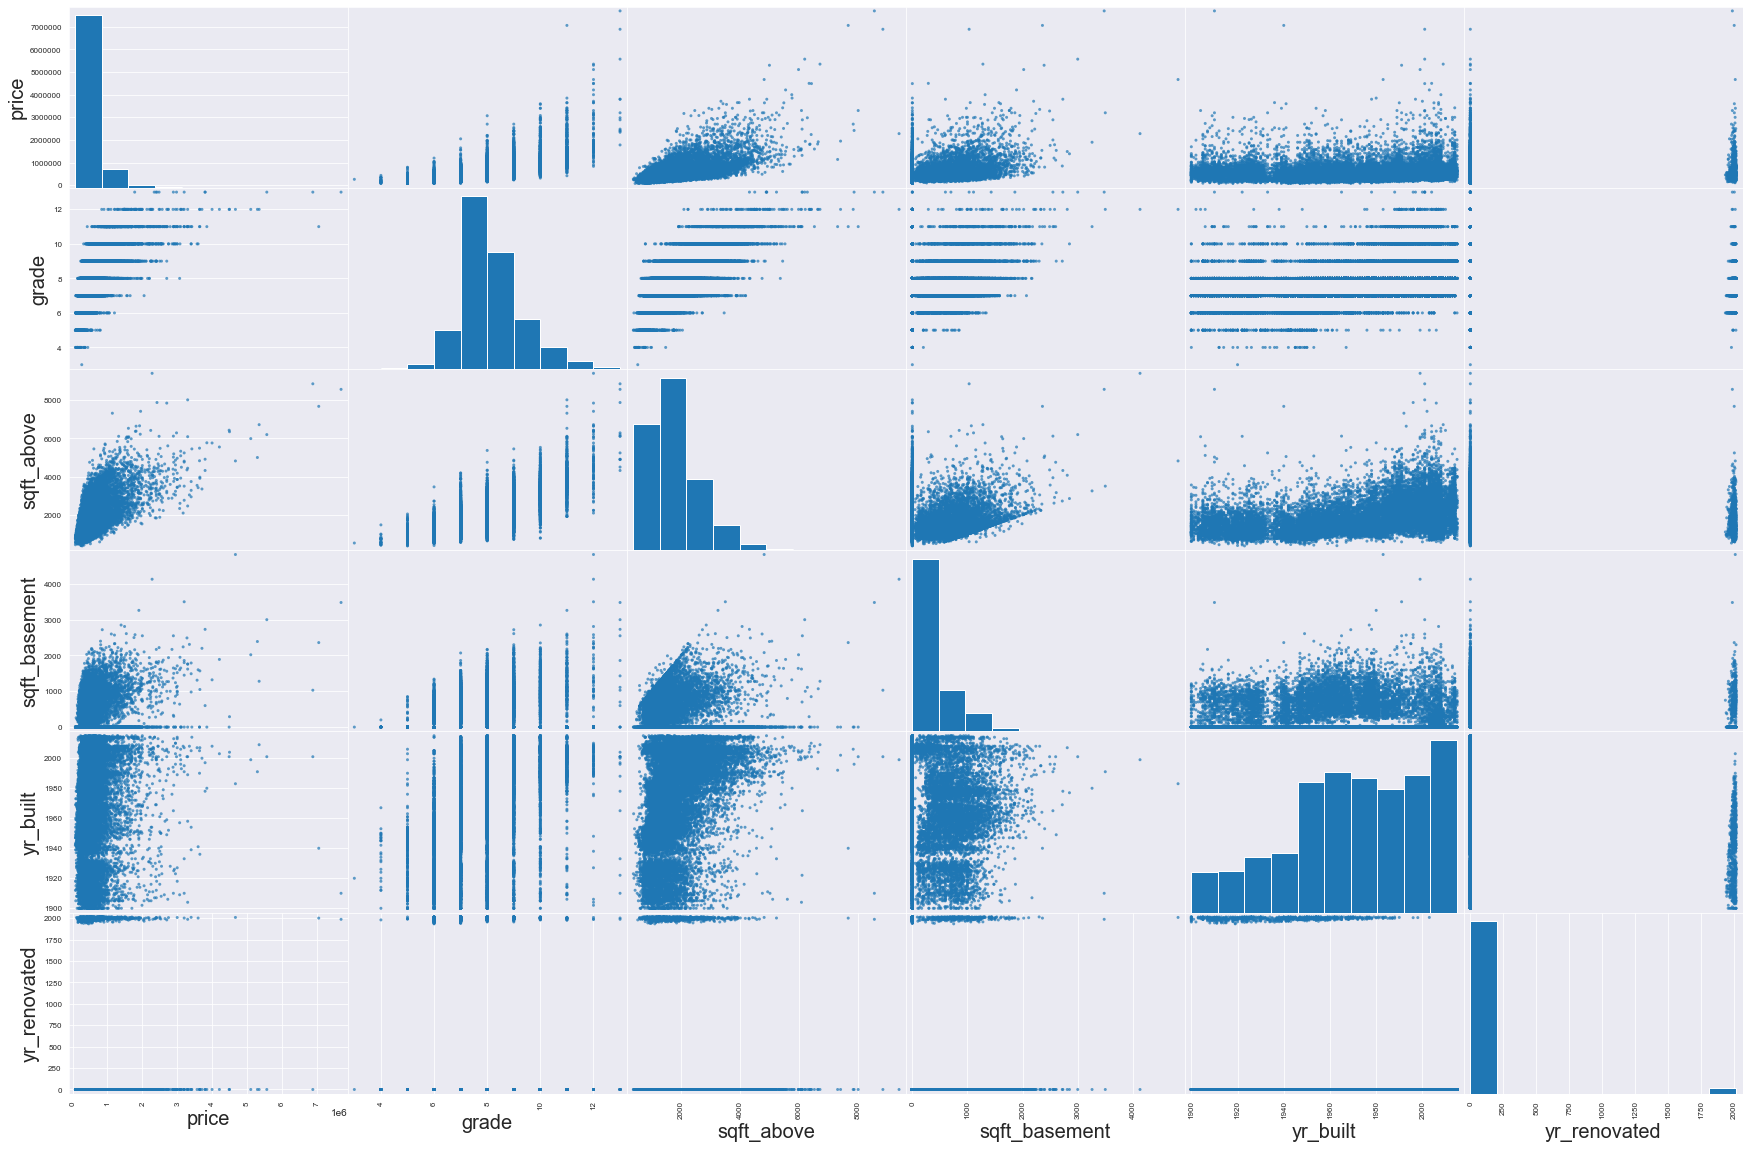

In [103]:
matrix = pd.plotting.scatter_matrix(house_data[list_col3], alpha=.7, figsize=(30,20));

for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

#### Plot 4
Looking across the top row with price as the y-variable:

- Zipcode, it's difficult to see any relationship as is. Would likely have to break into dummy columns. Then we could   potentially see high-priced zipcodes to focus on (70 unique zipcodes total btw)

- Latitude looks like a humpback whale. There are clearly certain latitudes that are more pricey. We will likely have   to bucket and break-up this data to make sense of it.

- Same goes for longitude.

- Sqft_living15 appears to have a moderate upward trend with price. The data is skewed right but not ridiculously so.
  (It's the square-footage of the living areas of the 15 nearest neighbors. I presume this will have a collinear         relationship with sqft_living.)

- Sqft_lot15 does not appear to have any sensible relationship with price.

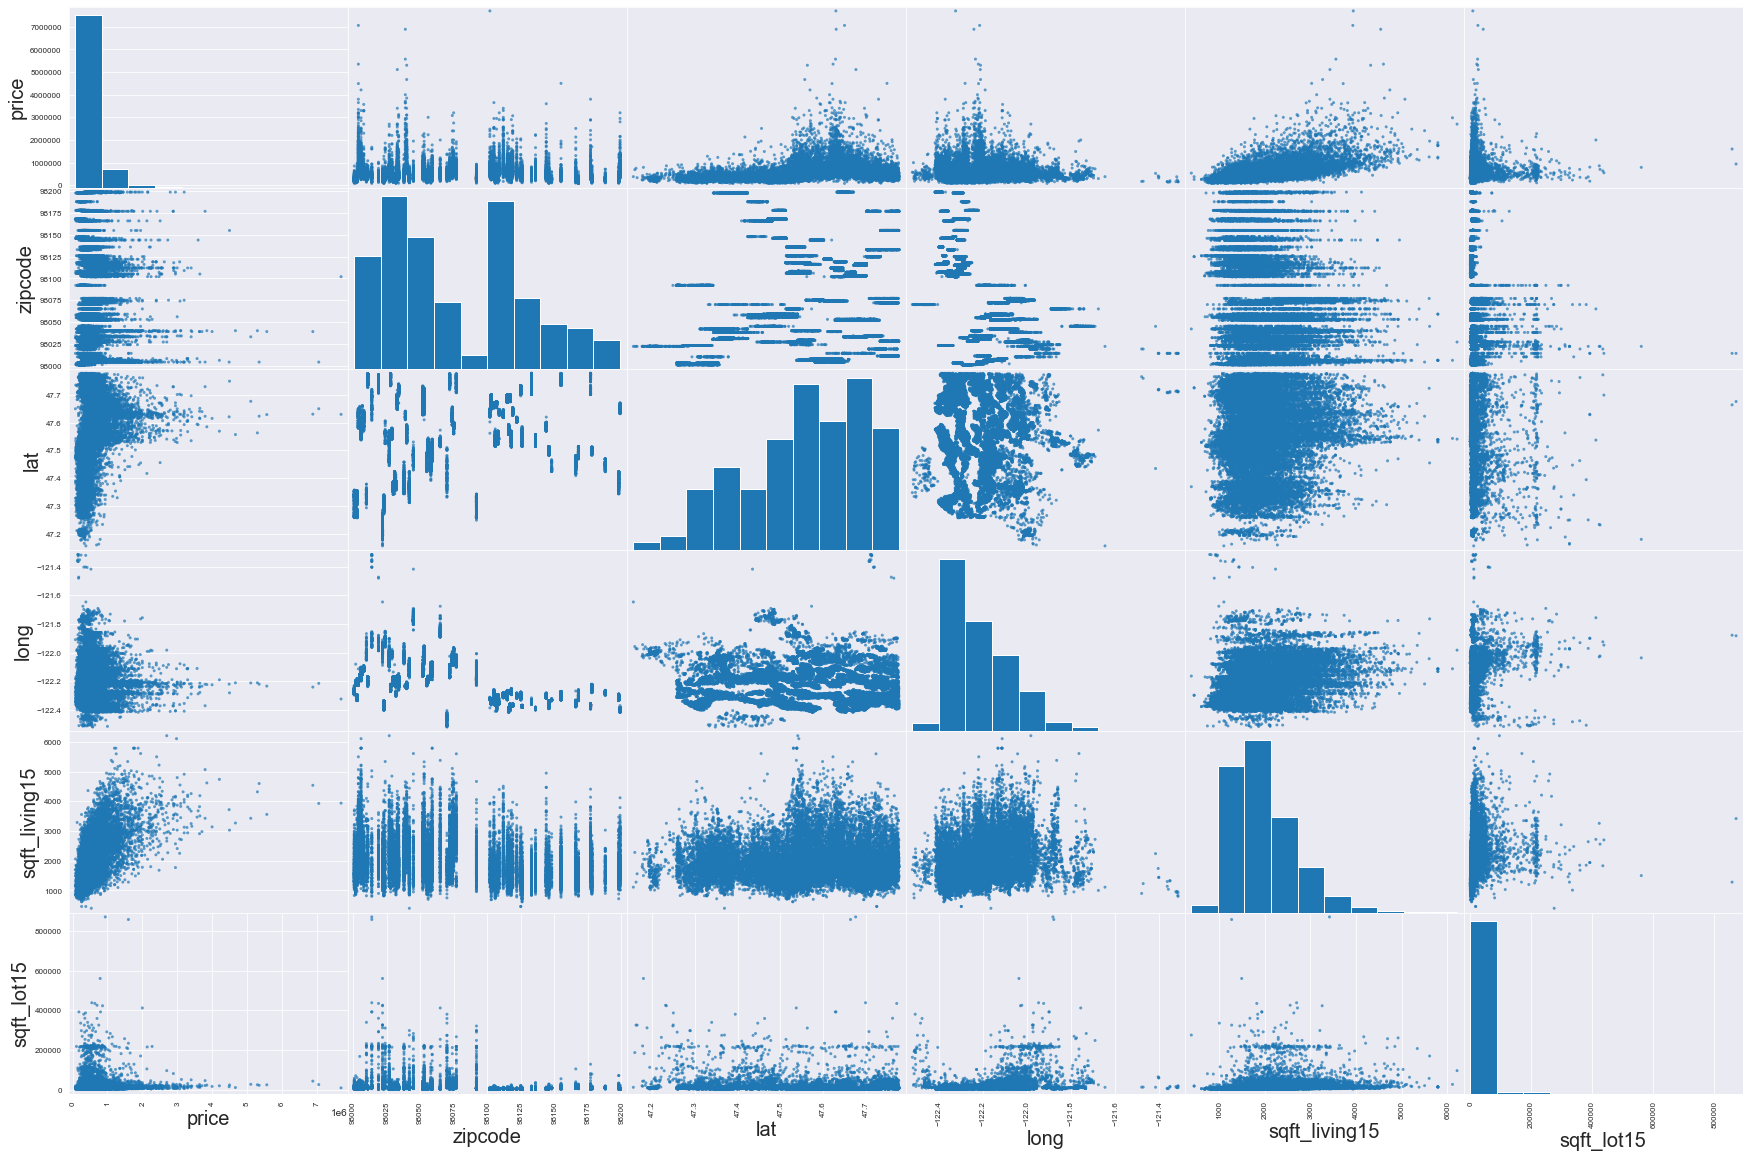

In [102]:
matrix = pd.plotting.scatter_matrix(house_data[list_col4], alpha=.7, figsize=(30,20));

for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

In [113]:
reno = house_data[house_data['yr_renovated'] > 0]

In [108]:
new_reno = reno[reno[]]

21596

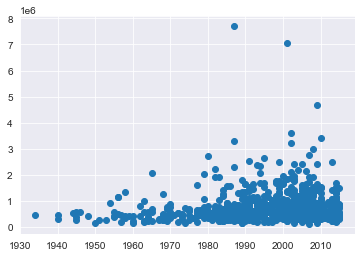

In [117]:
plt.scatter(reno['yr_renovated'], reno['price']);

### Checking Collinearity

We'll look at the correlation between our feature variables. It's important to check for collinearity so that your model is accurate and not overfitting.

Due to the similar nature and relationship of certain variables, I presume there will be variables where we'll have to pick whichever is best suited and drop the other.

In [14]:
feats = list_col
feats.remove('date')

In [19]:
# This is a little hard to make sense of
corr = house_data[feats].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981


In [20]:
# Create a new df that only includes the variable pairs that are correlated
# These variables are our feature variables only
# We'll start with a cutoff of 0.5 to see which have a moderate and above correlation - we may change during modeling
coral = house_data[feats].corr().abs().stack().reset_index().sort_values(0, ascending=False)

coral['pairs'] = list(zip(coral.level_0, coral.level_1))

coral.set_index(['pairs'], inplace = True)

coral.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
coral.columns = ['cc']

coral.drop_duplicates(inplace=True)

coral[(coral.cc>.5) & (coral.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_living15, grade)",0.713867
"(price, sqft_living)",0.701917


In [ ]:
# May try some unit vectorization for sqft_above and sqft_living (or more)
# Still an issue with all this cross=collinearity. Like bathroom, grade

In [21]:
p = pd.get_dummies(house_data['yr_renovated'])
p.drop(columns=0.0, axis=1, inplace=True)
p.head()

,1934.0,1940.0,1944.0,1945.0,1946.0,1948.0,1950.0,1951.0,1953.0,1954.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
# Only have 744 data points for renovated houses. Nonetheless, may be worth throwing into the mix
p.sum().sum()

744

#### Plan so far...

* Variables: 